In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('food_data.csv')

In [2]:
df.head()

,fdc_id,data_type,description,food_category_id,publication_date,description_category,nutrient_id,amount
0,319874,sample_food,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01,Legumes and Legume Products,NaN,NaN
1,319875,market_acquisition,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01,Legumes and Legume Products,NaN,NaN
2,319876,market_acquisition,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01,Legumes and Legume Products,NaN,NaN
3,319877,sub_sample_food,Hummus,16.0,2019-04-01,Legumes and Legume Products,1051.0,56.30
4,319877,sub_sample_food,Hummus,16.0,2019-04-01,Legumes and Legume Products,1002.0,1.28


In [3]:
df.tail()

,fdc_id,data_type,description,food_category_id,publication_date,description_category,nutrient_id,amount
160473,2715711,sub_sample_food,"Plum, black, with skin, pitted, raw",9.0,2024-10-31,Fruits and Fruit Juices,1010.0,4.02
160474,2715712,sub_sample_food,"Plum, black, with skin, pitted, raw",9.0,2024-10-31,Fruits and Fruit Juices,1012.0,2.84
160475,2715713,sub_sample_food,"Plum, black, with skin, pitted, raw",9.0,2024-10-31,Fruits and Fruit Juices,1011.0,0.00
160476,2715714,sub_sample_food,"Plum, black, with skin, pitted, raw",9.0,2024-10-31,Fruits and Fruit Juices,1013.0,0.00
160477,2715715,sub_sample_food,"Plum, black, with skin, pitted, raw",9.0,2024-10-31,Fruits and Fruit Juices,1014.0,0.00


In [35]:
# converting dtype
df['publication_date'] = pd.to_datetime(df['publication_date'])
df['year'] = df['publication_date'].dt.year # extract year
df['month'] = df['publication_date'].dt.month # extract month

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147680 entries, 3 to 160477
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   fdc_id                147680 non-null  int64         
 1   data_type             147680 non-null  object        
 2   description           147680 non-null  object        
 3   food_category_id      147680 non-null  float64       
 4   publication_date      147680 non-null  datetime64[ns]
 5   description_category  147680 non-null  object        
 6   nutrient_id           147680 non-null  float64       
 7   amount                147680 non-null  float64       
 8   year                  147680 non-null  int32         
 9   month                 147680 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(3)
memory usage: 11.3+ MB


In [33]:
df.dropna(axis=0, inplace=True)

In [34]:
df.isnull().sum()

fdc_id                  0
data_type               0
description             0
food_category_id        0
publication_date        0
description_category    0
nutrient_id             0
amount                  0
dtype: int64

In [11]:
df.describe()

,fdc_id,food_category_id,nutrient_id,amount
count,1.604780e+05,158556.000000,149615.000000,149588.000000
mean,1.086173e+06,9.440419,1203.294576,69.772707
std,9.119008e+05,6.310219,229.013121,590.751346
min,3.198740e+05,1.000000,1002.000000,0.000000
25%,3.301970e+05,4.000000,1089.000000,0.004969
50%,7.468500e+05,10.000000,1112.000000,0.480000
75%,2.005180e+06,15.000000,1271.000000,9.590000
max,2.715715e+06,25.000000,2069.000000,40700.000000


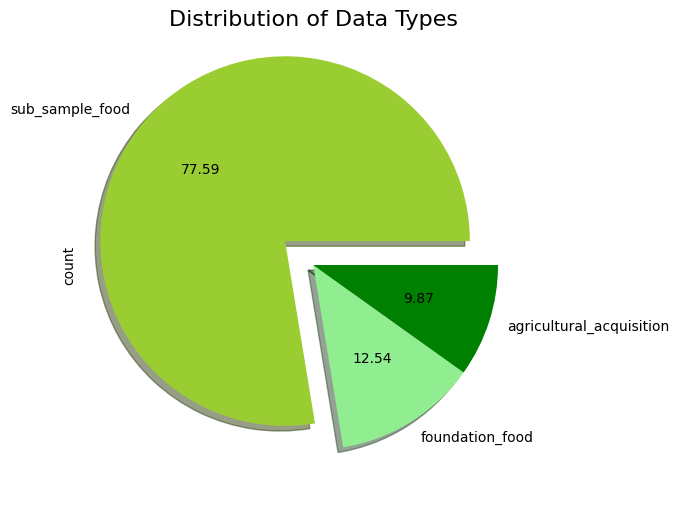

In [37]:
myexplode = [0.2, 0, 0]
mycolors = ['yellowgreen', 'lightgreen', 'green']
df['data_type'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(9, 6), shadow=True,
                                    explode=myexplode, colors=mycolors)
plt.title('Distribution of Data Types', fontsize=16)
plt.show()


In [41]:
top_des = df['description'].value_counts().nlargest(5)
top_des.reset_index()

,description,count
0,Bacon,3124
1,"SOY MILK, UNSWEETENED, PLAIN, SHELF STABLE",2220
2,American cheese,2116
3,American Cheese,2089
4,"Bacon, cooked",1839


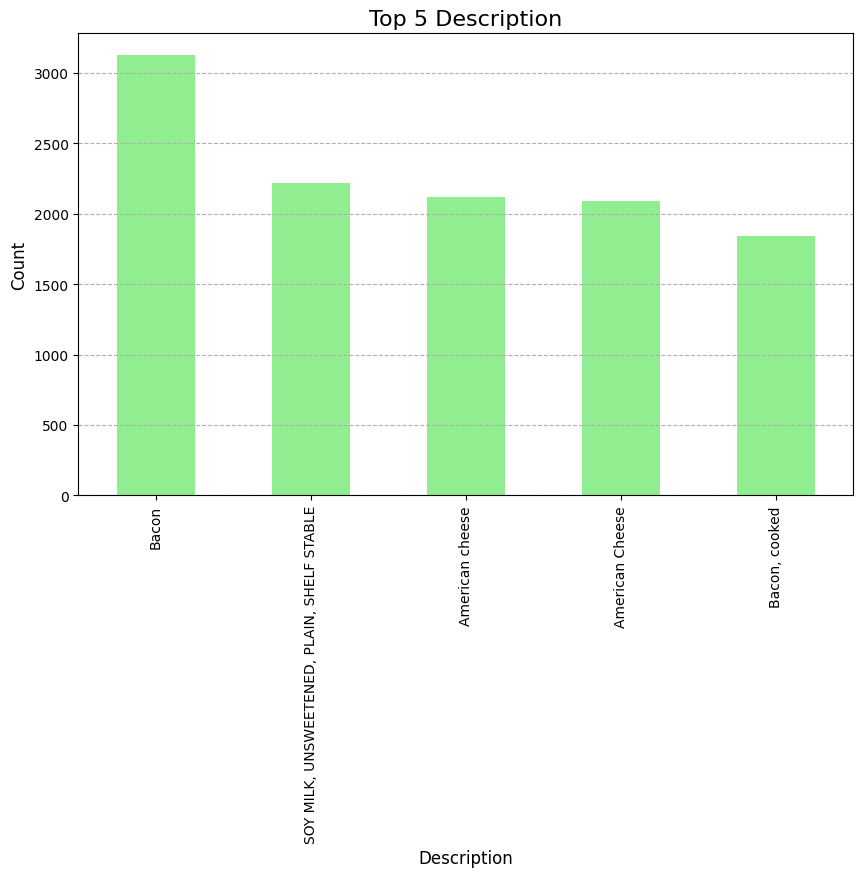

In [46]:
plt.figure(figsize=(10,6))
top_des.plot(kind='bar', color='lightgreen')
plt.title("Top 5 Description", fontsize=16)
plt.xlabel("Description", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(linestyle='--', axis='y')
plt.show()

In [47]:
top_des_category = df['description_category'].value_counts().nlargest(5)

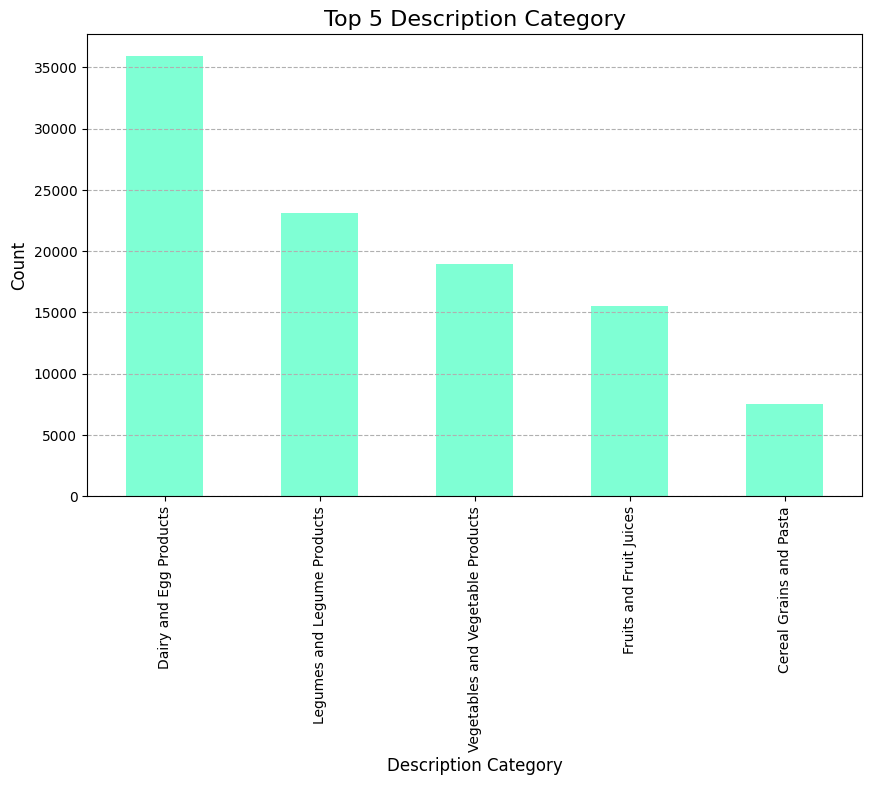

In [48]:
plt.figure(figsize=(10,6))
top_des_category.plot(kind='bar', color='aquamarine')
plt.title("Top 5 Description Category", fontsize=16)
plt.xlabel("Description Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(linestyle='--', axis='y')
plt.show()

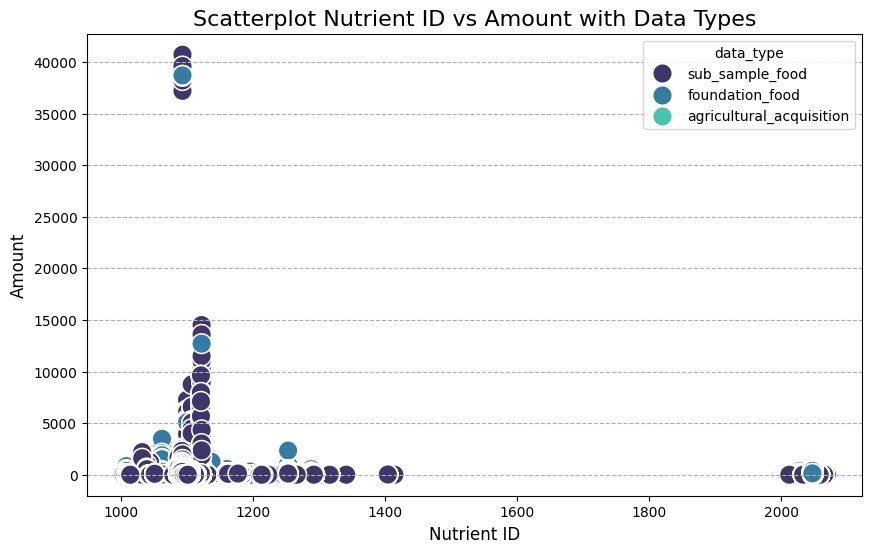

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['nutrient_id'], y=df['amount'], s=200, color='navy', hue=df['data_type'], palette='mako')
plt.title('Scatterplot Nutrient ID vs Amount with Data Types', fontsize=16)
plt.xlabel("Nutrient ID", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.grid(linestyle='--', axis='y')
plt.show()

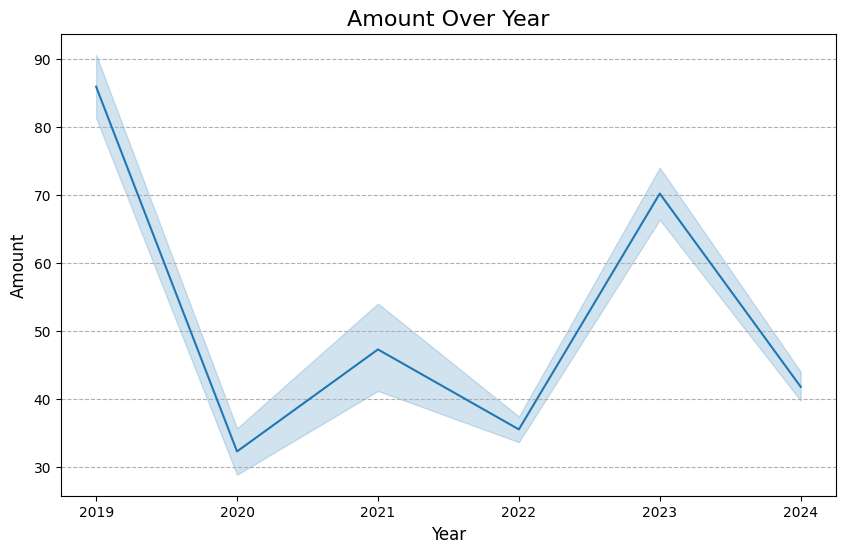

In [54]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['year'], y=df['amount'])
plt.title("Amount Over Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.grid(linestyle='--', axis='y')
plt.show()

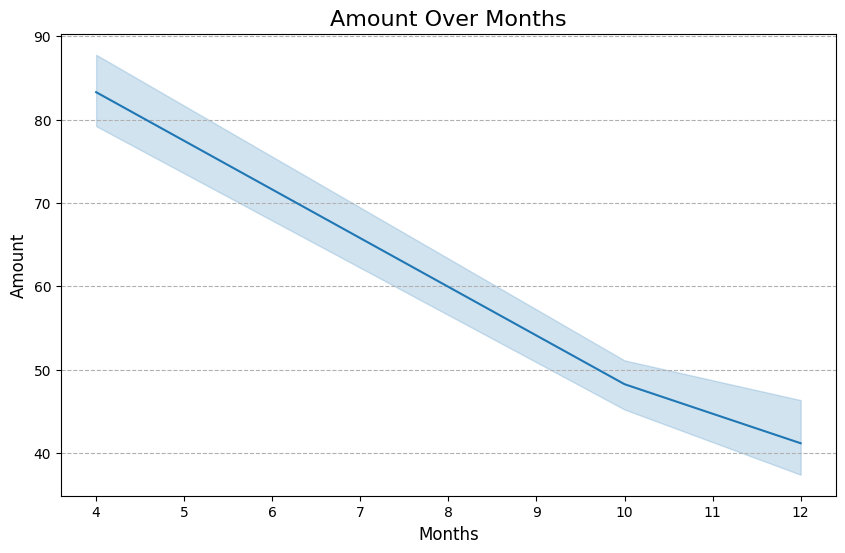

In [55]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['month'], y=df['amount'])
plt.title("Amount Over Months", fontsize=16)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.grid(linestyle='--', axis='y')
plt.show()

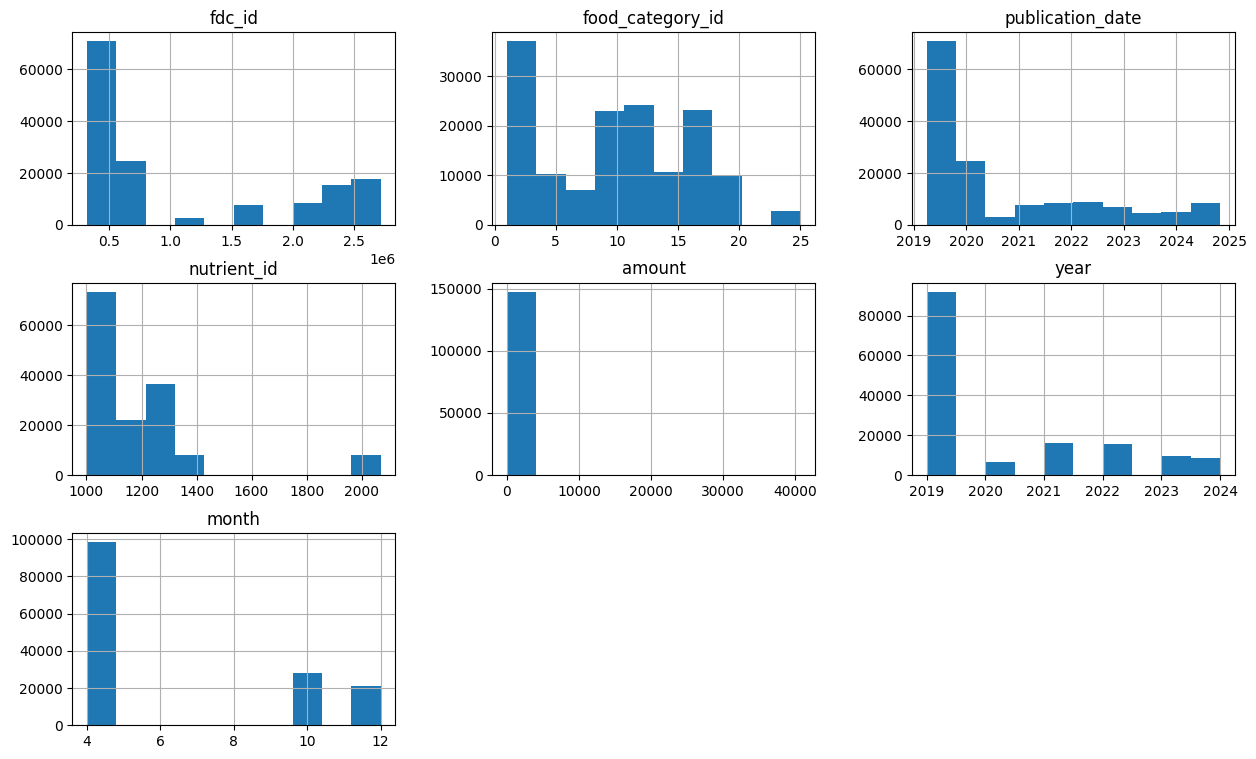

In [56]:
df.hist(figsize=(15,9))
plt.grid(linestyle='--', axis='y')
plt.show()

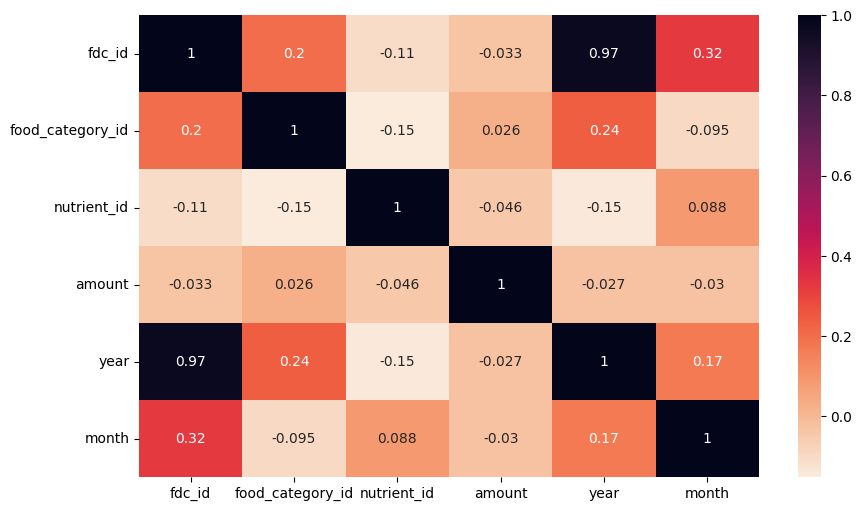

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='rocket_r')
plt.show()

In [59]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [60]:
df.drop(['fdc_id', 'publication_date'], axis=1, inplace=True)

In [61]:
# Encoding Categorical Cols
le = LabelEncoder()
for c in ['data_type', 'description', 'description_category']:
    df[c] = le.fit_transform(df[c])

In [ ]:
X = df.drop(columns='amount', axis=1)
y = df['amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(118144, 7)
(118144,)
(29536, 7)
(29536,)


In [64]:
# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train, X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
    "K Means": KMeans()
}


Performance: LinearRegression 
R2 Score: 0.0085 
MSE: 502137.00989780057


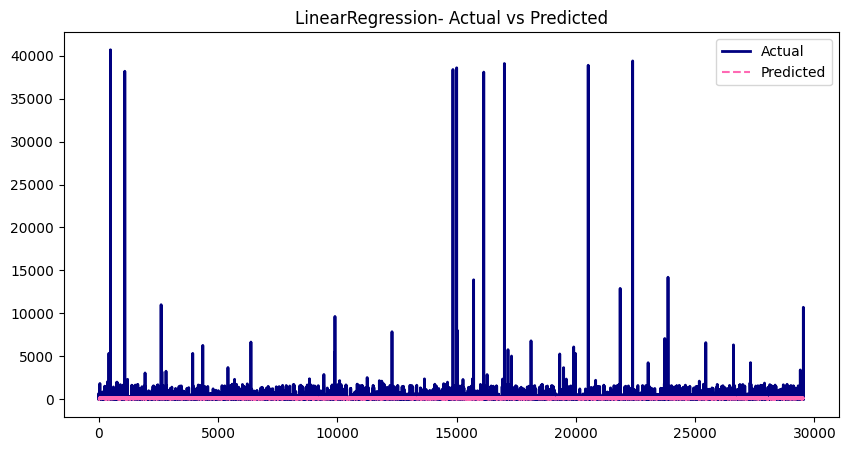


Performance: Ridge 
R2 Score: 0.0085 
MSE: 502137.0120848662


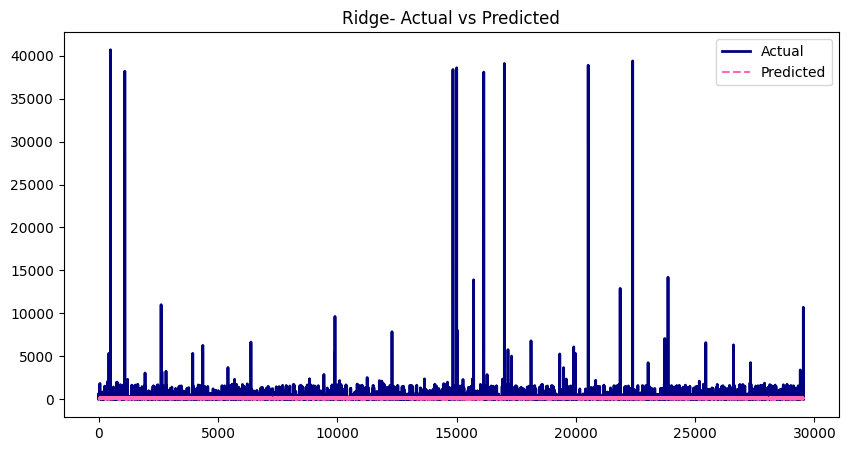


Performance: RandomForest 
R2 Score: 0.9916 
MSE: 4259.078230054102


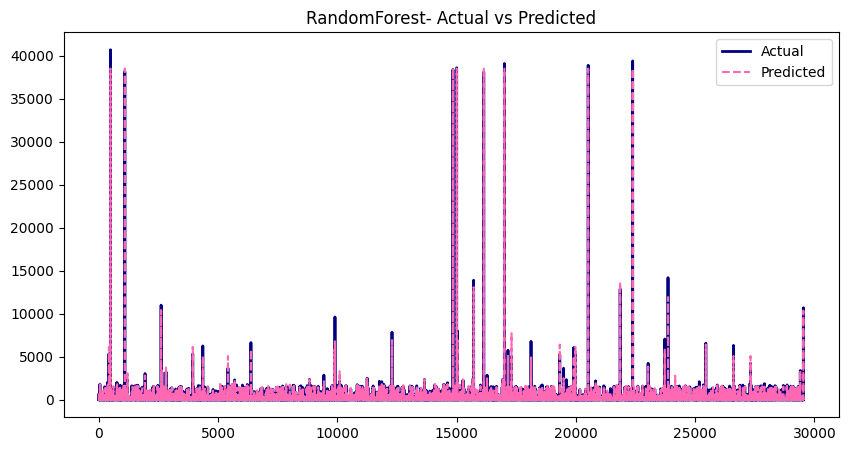


Performance: AdaBoost Regressor 
R2 Score: 0.3396 
MSE: 334466.0505346263


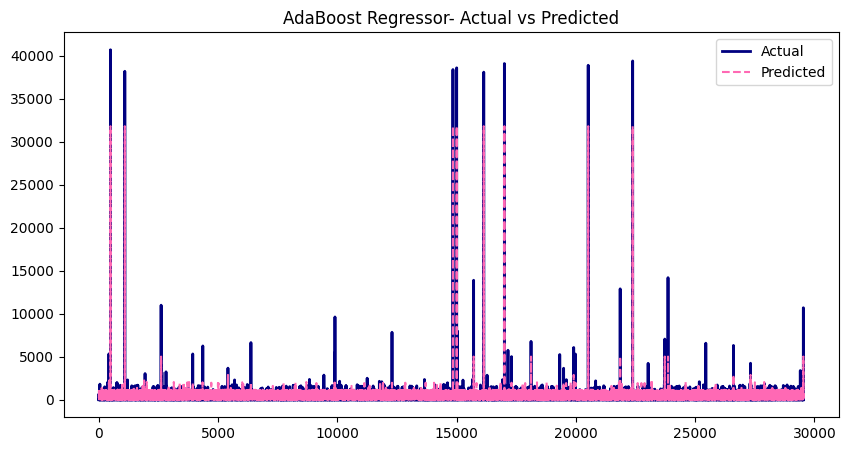


Performance: Bagging Regressor 
R2 Score: 0.9905 
MSE: 4821.027972658767


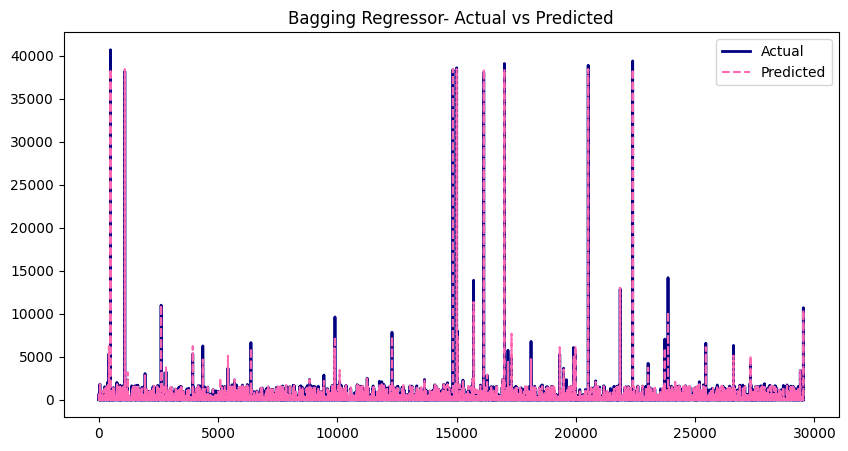


Performance: Gradient Boosting Regressor 
R2 Score: 0.2871 
MSE: 361032.8271426427


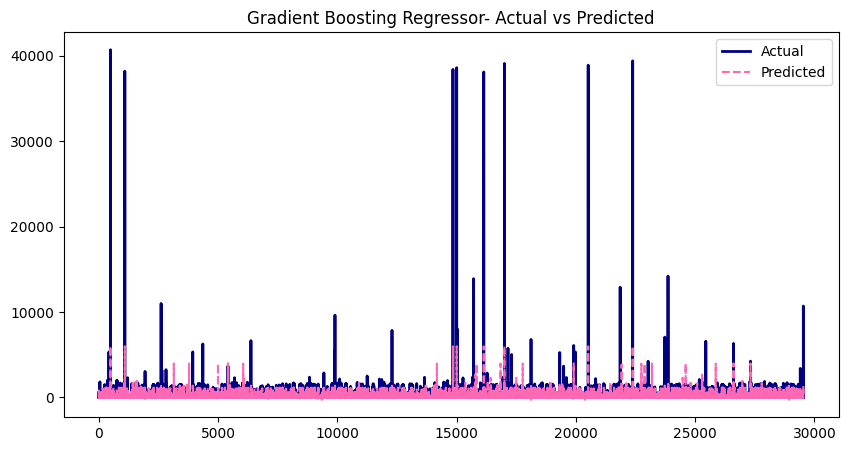


Performance: Decision Tree 
R2 Score: 0.9897 
MSE: 5213.845419960238


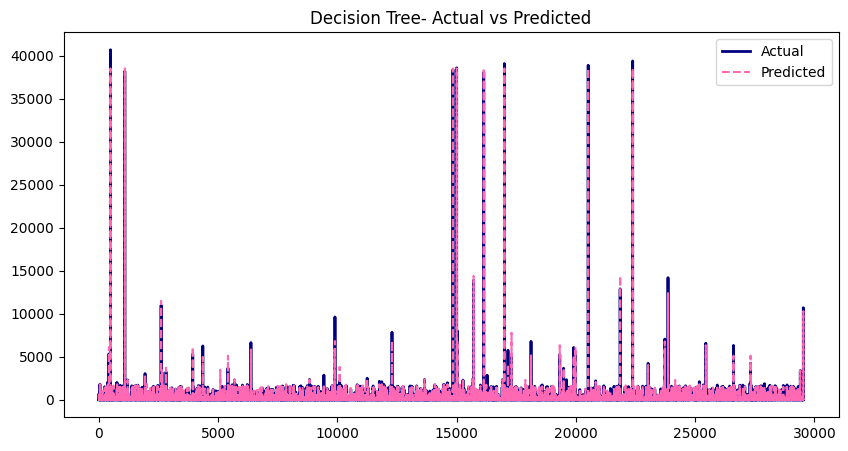


Performance: KNN 
R2 Score: 0.9682 
MSE: 16127.66954692715


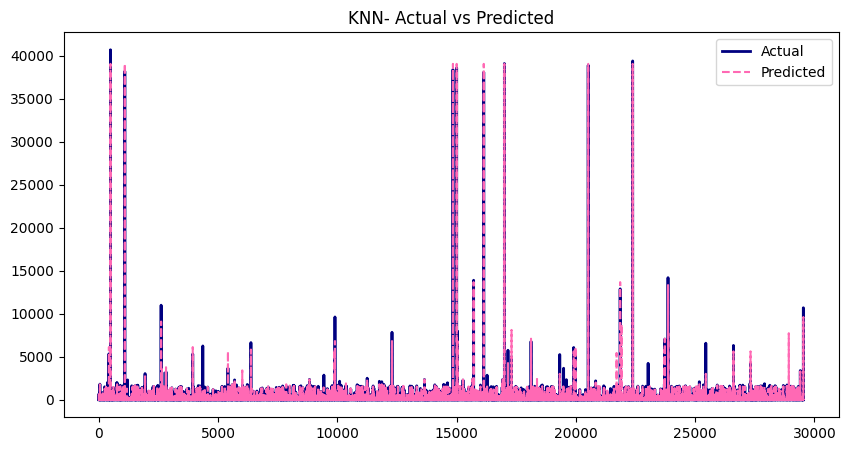


Performance: K Means 
R2 Score: -0.0097 
MSE: 511318.89345890476


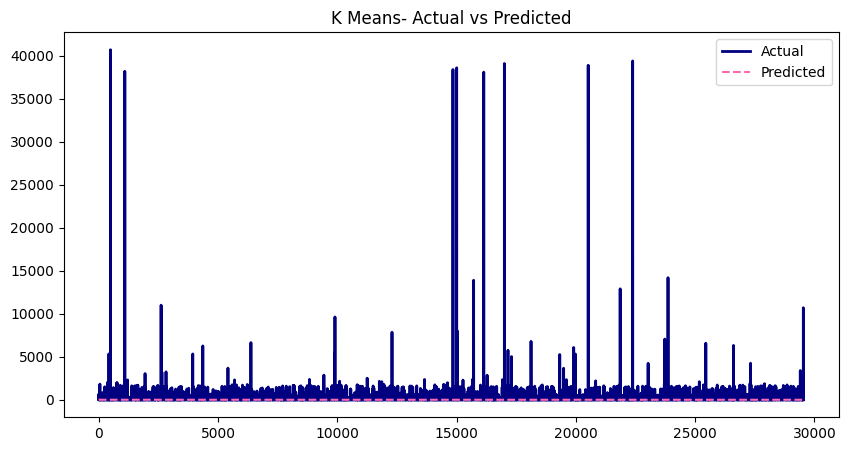


 Models Summary:


,Models,R2 Score,MSE
0,LinearRegression,0.008468,502137.009898
1,Ridge,0.008468,502137.012085
2,RandomForest,0.991590,4259.078230
3,AdaBoost Regressor,0.339555,334466.050535
4,Bagging Regressor,0.990480,4821.027973
5,Gradient Boosting Regressor,0.287096,361032.827143
6,Decision Tree,0.989705,5213.845420
7,KNN,0.968154,16127.669547
8,K Means,-0.009662,511318.893459


In [71]:
res = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_preds = model.predict(X_test_scaled)
    score = r2_score(y_test, y_preds)
    mse = mean_squared_error(y_test, y_preds)
    
    print(f"\nPerformance: {name} ")
    print(f"R2 Score: {score:.4f} ")
    print("MSE:", mse)
    
    # Plot Actual vs Predicted Values
    plt.figure(figsize=(10,5))
    plt.plot(y_test.values, label='Actual', color='navy', linewidth=2)
    plt.plot(y_preds, label='Predicted', color='hotpink', linestyle='dashed')
    plt.title(f"{name}- Actual vs Predicted")
    plt.legend()
    plt.title(f"{name}- Actual vs Predicted")
    plt.show()
    
    # Summary into DataFrame
    
    res.append({
        'Models': name,
        'R2 Score': score,
        'MSE': mse
    })
    new_result = pd.DataFrame(res)
print("\n Models Summary:")
new_result

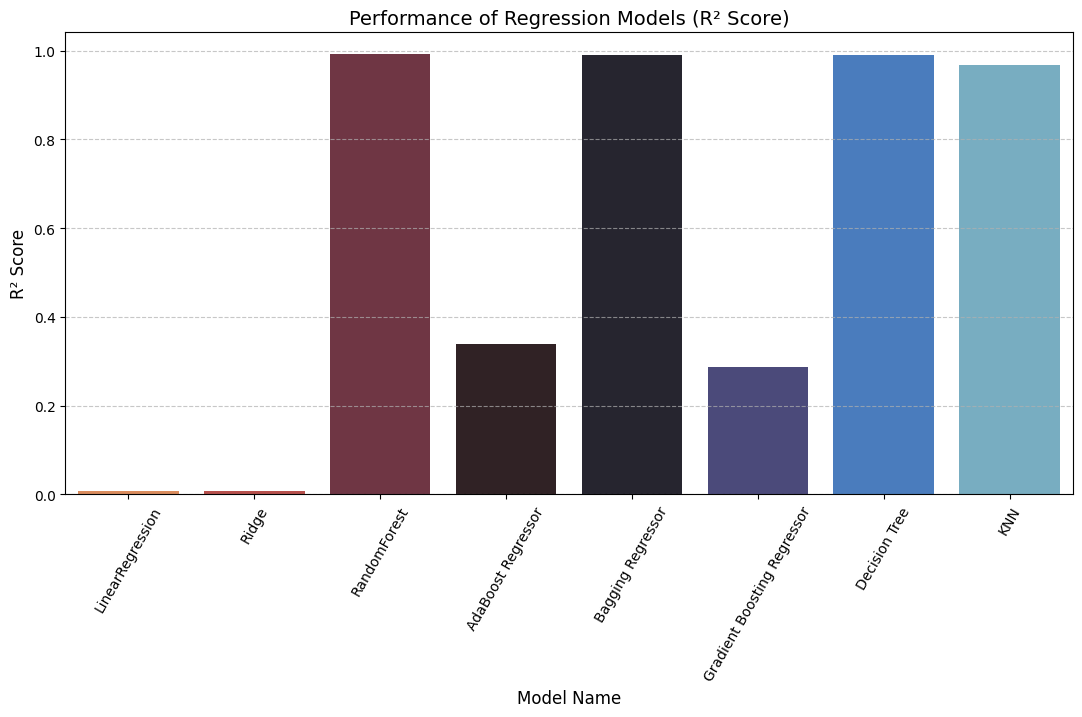

In [73]:
# Summary
filtered_result = new_result[new_result['R2 Score'] >= 0]
plt.figure(figsize=(13,6))
sns.barplot(x='Models', y='R2 Score', data=filtered_result, palette='icefire_r', hue='Models', legend=False)
plt.title("Performance of Regression Models (R² Score)", fontsize=14)
plt.xlabel('Model Name', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()